<a href="https://colab.research.google.com/github/shivamm007/House_price_eda./blob/main/House_price_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
import plotly.express as px

Area_type – describes the area

Availability – when it can be possessed or when it is ready(categorical and 
time-series)

Location – where it is located in Bengaluru (Area name)

Size – in BHK or Bedroom (1-10 or more)

Society – to which society it belongs

Total_sqft – size of the property in sq.ft

Bath – No. of bathrooms

Balcony – No. of the balcony

Price – Value of the property in lakhs(INR)

In [41]:
df1 = pd.read_csv('/content/Bengaluru_House_Data (1).csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [23]:
df1.shape

(13320, 9)

In [24]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [25]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [26]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [59]:
df2 = df1.copy()
df2.shape

(13320, 9)

In [60]:
df2.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [61]:
df2.shape

(13320, 9)

In [62]:
df3 = df2.dropna()
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [63]:
df3.shape

(7496, 9)

In [64]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [65]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,Shxorm,1195 - 1440,2.0,0.0,63.770
661,Super built-up Area,Ready To Move,Yelahanka,2 BHK,Rarthne,1120 - 1145,2.0,0.0,48.130
672,Built-up Area,18-Mar,Bettahalsoor,4 Bedroom,Toainnt,3090 - 5002,4.0,0.0,445.000
772,Super built-up Area,20-Dec,Banashankari Stage VI,2 BHK,Brens7,1160 - 1195,2.0,0.0,59.935
850,Super built-up Area,22-Dec,Bannerghatta Road,2 BHK,PrarePa,1115 - 1130,2.0,0.0,58.935


Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [66]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [67]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00


In [68]:
df4.loc[30]

area_type       Super built-up  Area
availability                  19-Dec
location                   Yelahanka
size                           4 BHK
society                      LedorSa
total_sqft                    2475.0
bath                             4.0
balcony                          0.0
price                          186.0
Name: 30, dtype: object

In [83]:
df4 = pd.get_dummies(df3,drop_first = True)
df4

,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_15-Aug,availability_15-Dec,availability_15-Jun,availability_16-Dec,...,total_sqft_986,total_sqft_987,total_sqft_990,total_sqft_991,total_sqft_992,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_999
0,2.0,1.0,39.07,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,3.0,120.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,95.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.0,1.0,38.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,5.0,3.0,295.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,2.0,1.0,57.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,3.0,3.0,112.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,4.0,0.0,231.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,2.0,1.0,60.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



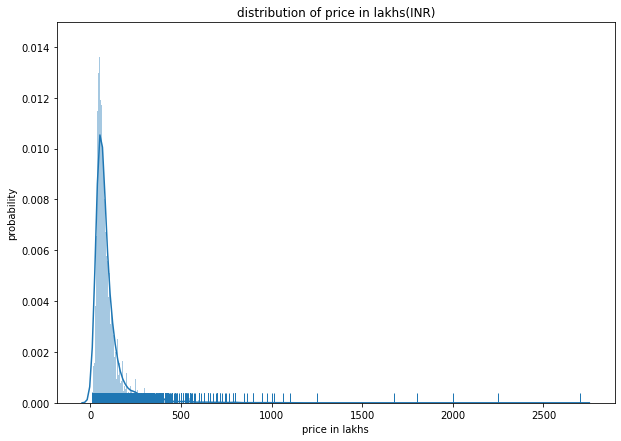

In [69]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(df4['price'], kde=True, rug=True, ax=ax, bins=500)
ax.set(title= 'distribution of price in lakhs(INR)', xlabel='price in lakhs', ylabel='probability')
plt.show()

Most of the house price lies below 500 lakhs.

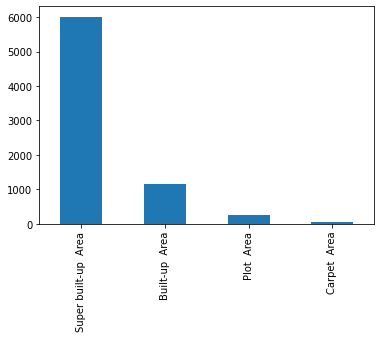

In [70]:
df4.area_type.value_counts().plot(kind='bar')

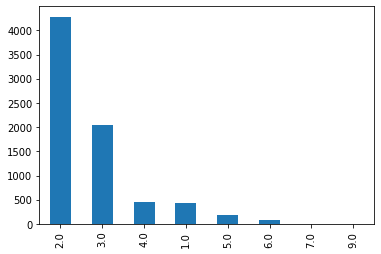

In [73]:
df4.bath.value_counts().plot(kind='bar')

balcony

number of balcony in the house

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

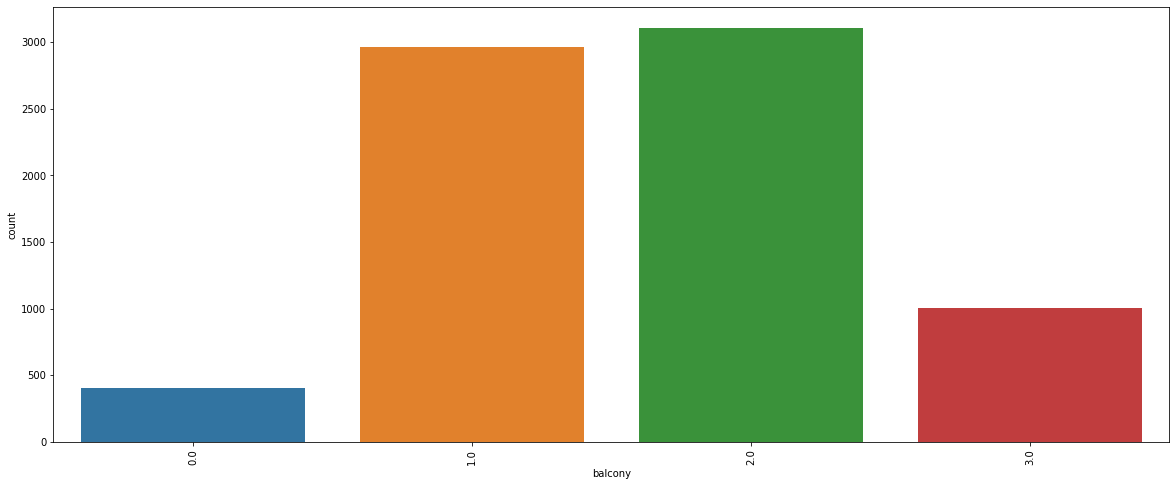

In [75]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'balcony', data = df4)
plt.xticks(rotation = 90)